# Basic Time Series Models - Lab

## Introduction

Now that you have an initial understanding of the the White Noise and the Random Walk model, let's try to generate some examples!

## Objectives

You will be able to:
- Explain what the goal is of time series modeling
- Understand and explain what a White Noise model is
- Understand and explain what a Random Walk model is
- Understand the mathematical formulations of Random Walk and White Noise models

## A White Noise Model

To get a good sense of how a model works, it is always a good idea to generate a process. Let's consider the following example:
- Every day in August, September and October 2018, Nina takes the subway to work. Let's ignore weekends for now and assume that Nina works every day.
- We know that on average, it takes her 25 minutes, and the standard deviation is 4 minutes. 
- Create and visualize a time series that reflects this information.

Let's import pandas, numpy and matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(12) # do not change this seed.

Create the dates. You can do this using `pd.date_range`, more info [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html).

In [4]:
# your code here
dates = pd.date_range(start='8/1/2018', end='10/31/2018')
len(dates)

92

Generate the values for the wite noise process representing Nina's commute in August and September.

In [7]:
# your code here
times = np.random.normal(loc=25, scale=4, size=92)
len(times)

92

Create a time series with the dates and the commute times.

In [16]:
# your code here
df = pd.DataFrame([dates,times]).transpose()
df.columns = ['Date', 'Commute_Time']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df.set_index(['Date'], inplace=True)
df.head()

,Commute_Time
Date,
2018-08-01,20.1774
2018-08-02,23.4738
2018-08-03,27.2674
2018-08-04,29.3093
2018-08-05,21.2386


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2018-08-01 to 2018-10-31
Data columns (total 1 columns):
Commute_Time    92 non-null object
dtypes: object(1)
memory usage: 1.4+ KB


Visualize the time series and set appropriate axis labels.

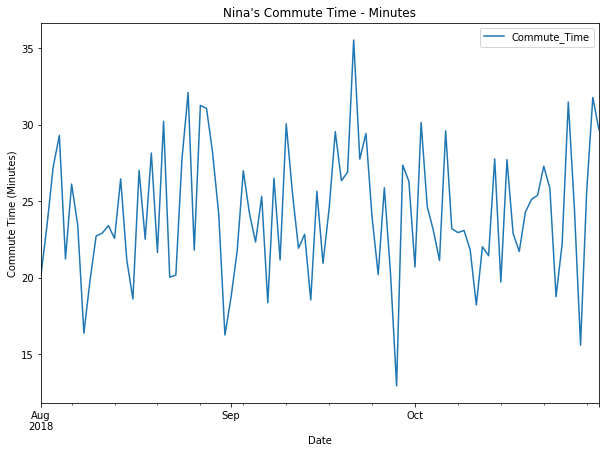

In [21]:
# your code here
df.plot(figsize=(10,7))
plt.ylabel('Commute Time (Minutes)')
plt.title("""Nina's Commute Time - Minutes""")
plt.show()

Print Nina's shortest and longest commute.

In [22]:
# your code here
longest_commute = df.max()
longest_commute

Commute_Time    35.556184
dtype: float64

In [23]:
# your code here
shortest_commute = df.min()
shortest_commute

Commute_Time    12.936338
dtype: float64

Look at the distribution of commute times.

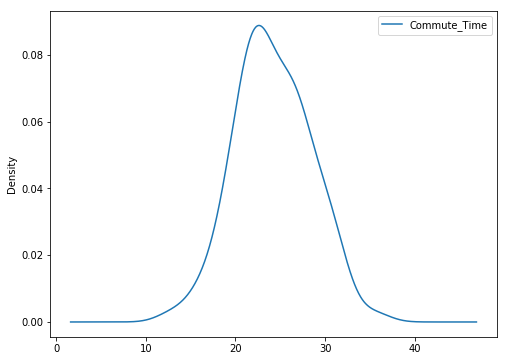

In [27]:
# your code here
df.plot(kind='kde', figsize=(8,6))

Compute the standard deviation and the mean of the commute series. The fact that the mean and standard error are constant over time is crucial!

In [28]:
# your code here
mean = df.mean()
mean

Commute_Time    24.19302
dtype: float64

In [29]:
# your code here
std = df.std()
std

Commute_Time    4.181987
dtype: float64

Now, let's look at the mean and standard error for August and October respectively. 

In [31]:
# your code here
aug_mean = df['2018-08-01': '2018-08-31'].mean()
aug_mean

Commute_Time    24.117829
dtype: float64

In [32]:
oct_mean = df['2018-10-01': '2018-10-31'].mean()
oct_mean

Commute_Time    24.187653
dtype: float64

Because you've generated this data, you know that the mean and constant will be the same over time. But comparing mean and standard deviation over time is useful practice for real data examples to check if a process is White Noise!

## A Random Walk Model

Remember from the lecture that the Random Walk Model:

- Has no specified mean or variance
- Has a strong dependence over time

Mathematically, this can be written as:

$$Y_t = Y_{t-1} + \epsilon_t$$

Because today's value depends on yesterday's, you need a starting value when you start off your time series. In practice, this is what the first few time series values look like:
$$ Y_0 = \text{some specified starting value}$$
$$Y_1= Y_{0}+ \epsilon_1 $$
$$Y_2= Y_{1}+ \epsilon_2 = Y_{0} + \epsilon_1 + \epsilon_2  $$
$$Y_3= Y_{2}+ \epsilon_3 = Y_{0} + \epsilon_1 + \epsilon_2 + \epsilon_3 $$
$$\ldots $$

Keeping this in mind, let's create a random walk model:
- starting from a value of 1000 USD of a share value upon a company's first IPO (initial public offering) in 2010 until end of November of the same year, generate a random walk model with a white noise error term, which has a standard error of 10.

In [58]:
# keep the random seed
np.random.seed(11)




In [59]:
dates = pd.date_range(start='1/1/2010', end='11/30/2010')
len(dates)

334

In [60]:
# create a series with the specified dates

error = np.random.normal(loc=0, scale=1, size=334)
len(error)

334

In [61]:
Y = 1000
share_values = []

for i in range(0,len(error)):
    Y += error[i]
    share_values.append(Y)

In [62]:
df_rw = pd.DataFrame([dates, share_values]).transpose()
df_rw.columns = ['Date', 'Share_Value']
df_rw['Date'] = pd.to_datetime(df_rw['Date'], format='%Y-%m-%d %H:%M:%S')
df_rw.set_index(['Date'], inplace=True)
df_rw.head()

,Share_Value
Date,
2010-01-01,1001.75
2010-01-02,1001.46
2010-01-03,1000.98
2010-01-04,998.325
2010-01-05,998.317


Visualize the time series with correct axis labels

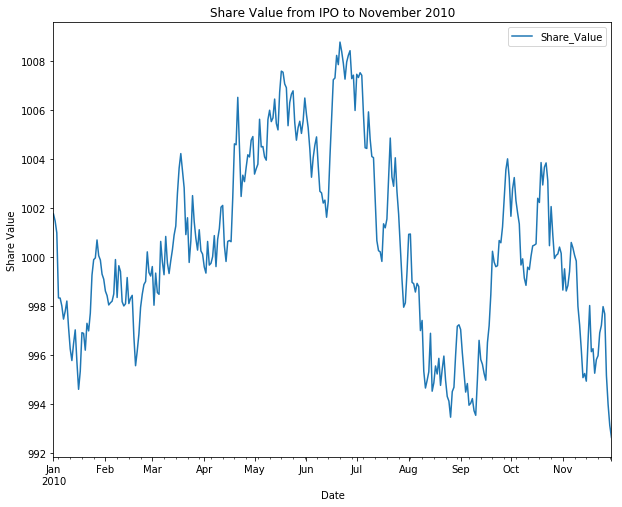

In [63]:
# your code here

df_rw.plot(figsize=(10,8))
plt.ylabel('Share Value')
plt.title('Share Value from IPO to November 2010')
plt.show()

You can see how this very much looks like the exchange rate series you looked at in the lecture!

## Random Walk with a Drift

Repeat the above, but include a drift parameter $c$ of 8 now!

In [ ]:
# keep the random seed
np.random.seed(11)


In [54]:
# your code here

Y = 1000
share_values = []
c=8

for i in range(0,len(error)):
    Y += error[i] + c
    share_values.append(Y)

In [55]:
df = pd.DataFrame([dates, share_values]).transpose()
df.columns = ['Date', 'Share_Value']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df.set_index(['Date'], inplace=True)
df.head()

,Share_Value
Date,
2010-01-01,1008.06
2010-01-02,1016.27
2010-01-03,1024.92
2010-01-04,1032.76
2010-01-05,1040.27


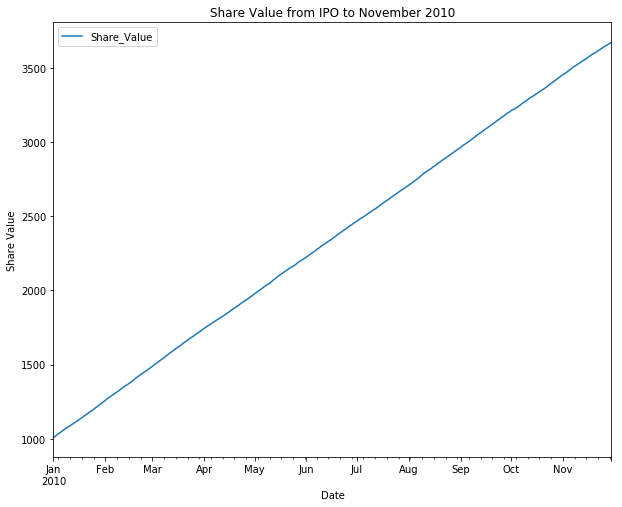

In [56]:
df.plot(figsize=(10,8))
plt.ylabel('Share Value')
plt.title('Share Value from IPO to November 2010')
plt.show()

Note that there is a very strong drift here!

## Differencing in a Random Walk model

One important property of the Random Walk model is that a differenced random walk returns a white noise. This is a result of the mathematical formula:

$$Y_t = Y_{t-1} + \epsilon_t$$
which is equivalent to
$$Y_t - Y_{t-1} = \epsilon_t$$

and we know that $\epsilon_t$ is a mean-zero white noise process! 

Plot the differenced time series for the shares time series (no drift).

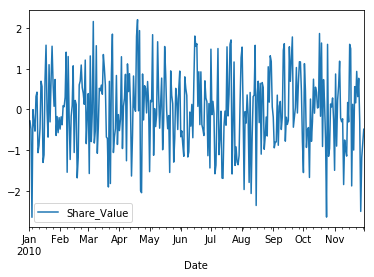

In [65]:
# your code here
diff_df = df_rw.diff(periods=1)
diff_df.plot()

This does look a lot like a white noise series!

Plot the differenced time series for the shares time series (with a drift).

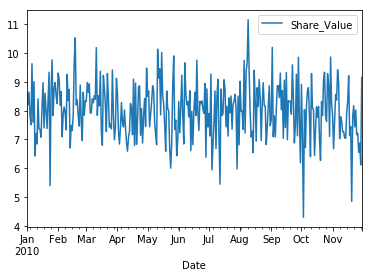

In [67]:
# your code here
diff_df_c = df.diff(periods=1)
diff_df_c.plot()

This is also a white noise series, but what can you tell about the mean?

The mean is equal to the drift $c$, so 8 for this example!

## Summary

Great, you now know how a Random Walk and Moving Average model work!